In [100]:
import torch
import lightning as L
from torch.utils.data import DataLoader
from lightning.pytorch.loggers import TensorBoardLogger
from lightning.pytorch.callbacks import EarlyStopping
import numpy as np
import cv2 as cv
from pathlib import Path
import matplotlib.pyplot as plt
import torchvision.models as models
from tqdm.auto import tqdm
from copy import copy, deepcopy
from time import time
from datetime import datetime
import gc

from image import Image
from hooked_vgg import Hooked_VGG
from style_transfer_model import StyleTransferModel
from custom_trainer import CustomTrainer

torch.set_float32_matmul_precision('medium')

In [101]:
base_img_path = Path('./test_images/tony.png')
style_img_path = Path('./test_images/daltonisme7.png')

content_weight = 1e4
style_weight = 1e6
tv_weight = 1e-2

start_with = 'content'

optimizer = 'LBFGS'

MAX_EPOCHS = 50

In [102]:
base_img = Image(base_img_path)
style_img = Image(style_img_path)

img_name = base_img_path.stem + '_' + style_img_path.stem + '_' + datetime.now().strftime('%Y%m%d%H%M') + '.jpg'

In [103]:
m = StyleTransferModel(base_img, style_img, content_feat_layers=[6,22], start_with=start_with, content_loss_weight=content_weight, style_loss_weight=style_weight, tv_loss_weight=tv_weight, optimizer=optimizer)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training Progress:   0%|          | 0/50 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


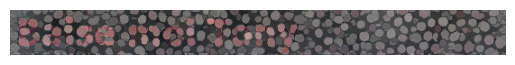

In [104]:
m.train(max_epochs = MAX_EPOCHS, from_checkpoint=False)
m.trained_img.save_to(Path('./generated_images') / img_name)

In [105]:
gc.collect()

4100

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
d:\Python\StyleTransferAI\Lib\site-packages\lightning\pytorch\callbacks\model_checkpoint.py:654: Checkpoint directory D:\StyleTransferAI\StyleTransferAI\trainings\lightning_logs\version_219\checkpoints exists and is not empty.
Restoring states from the checkpoint path at D:\StyleTransferAI\StyleTransferAI\trainings\lightning_logs\version_219\checkpoints\epoch=49-step=50.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Restored all states from the checkpoint at D:\StyleTransferAI\StyleTransferAI\trainings\lightning_logs\version_219\checkpoints\epoch=49-step=50.ckpt


Training Progress:   0%|          | 0/150 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=200` reached.


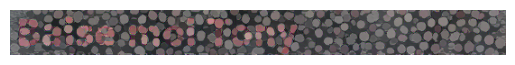

In [108]:
m.train(max_epochs=200, from_checkpoint=True)

In [107]:
# m.content_loss_weight = 1e1
# m.style_loss_weight = 1e2
# m.tv_loss_weight = 1e-3

# m._train_tensor = torch.nn.Parameter(m._train_tensor.data.to(m.used_device))

# m.train(max_epochs=400, from_checkpoint=True)

img_name = base_img_path.stem + '_' + style_img_path.stem + '_' + datetime.now().strftime('%Y%m%d%H%M') + '.jpg'
m.trained_img.save_to(Path('./generated_images') / img_name)

plt.imshow(cv.fastNlMeansDenoisingColored((m.trained_img.original_img * 255).astype('uint8'), h=1, hColor=1))